Derive spec2vec embeddings of MS/MS spectra

In [1]:
import os
from matchms.importing import load_from_json
folder_name = 'C:\\Users\\Gosia\\Documents\\gnps_from_simon'
spectra = []
for f in os.listdir(folder_name):
    if f.endswith('.txt'):
        spectra += load_from_json(os.path.join(folder_name,f ))
        print('processed',f)
spectrums = spectra

processed 0000.txt
processed 0001.txt
processed 0002.txt
processed 0003.txt
processed 0004.txt
processed 0005.txt
processed 0006.txt
processed 0007.txt
processed 0008.txt
processed 0009.txt
processed 0010.txt
processed 0011.txt
processed 0012.txt
processed 0013.txt
processed 0014.txt
processed 0015.txt
processed 0016.txt
processed 0017.txt
processed 0018.txt
processed 0019.txt
processed 0020.txt
processed 0021.txt
processed 0022.txt
processed 0023.txt
processed 0024.txt
processed 0025.txt
processed 0026.txt
processed 0027.txt
processed 0028.txt
processed 0029.txt
processed 0030.txt
processed 0031.txt
processed 0032.txt
processed 0033.txt
processed 0034.txt
processed 0035.txt
processed 0036.txt
processed 0037.txt
processed 0038.txt
processed 0039.txt
processed 0040.txt
processed 0041.txt
processed 0042.txt
processed 0043.txt
processed 0044.txt
processed 0045.txt
processed 0046.txt
processed 0047.txt
processed 0048.txt
processed 0049.txt
processed 0050.txt
processed 0051.txt
processed 00

processed 0432.txt
processed 0433.txt
processed 0434.txt
processed 0435.txt
processed 0436.txt
processed 0437.txt
processed 0438.txt
processed 0439.txt
processed 0440.txt
processed 0441.txt
processed 0442.txt
processed 0443.txt
processed 0444.txt
processed 0445.txt
processed 0446.txt
processed 0447.txt
processed 0448.txt
processed 0449.txt
processed 0450.txt
processed 0451.txt
processed 0452.txt
processed 0453.txt
processed 0454.txt
processed 0455.txt
processed 0456.txt
processed 0457.txt
processed 0458.txt
processed 0459.txt
processed 0460.txt
processed 0461.txt
processed 0462.txt
processed 0463.txt
processed 0464.txt
processed 0465.txt
processed 0466.txt
processed 0467.txt
processed 0468.txt
processed 0469.txt
processed 0470.txt
processed 0471.txt
processed 0472.txt
processed 0473.txt
processed 0474.txt
processed 0475.txt
processed 0476.txt
processed 0477.txt
processed 0478.txt
processed 0479.txt
processed 0480.txt
processed 0481.txt
processed 0482.txt
processed 0483.txt
processed 04

processed 0864.txt
processed 0865.txt
processed 0866.txt
processed 0867.txt
processed 0868.txt
processed 0869.txt
processed 0870.txt
processed 0871.txt
processed 0872.txt
processed 0873.txt
processed 0874.txt
processed 0875.txt
processed 0876.txt
processed 0877.txt
processed 0878.txt
processed 0879.txt
processed 0880.txt
processed 0881.txt
processed 0882.txt
processed 0883.txt
processed 0884.txt
processed 0885.txt
processed 0886.txt
processed 0887.txt
processed 0888.txt
processed 0889.txt
processed 0890.txt
processed 0891.txt
processed 0892.txt
processed 0893.txt
processed 0894.txt
processed 0895.txt
processed 0896.txt
processed 0897.txt
processed 0898.txt
processed 0899.txt
processed 0900.txt
processed 0901.txt
processed 0902.txt
processed 0903.txt
processed 0904.txt
processed 0905.txt
processed 0906.txt
processed 0907.txt
processed 0908.txt
processed 0909.txt
processed 0910.txt
processed 0911.txt
processed 0912.txt
processed 0913.txt
processed 0914.txt
processed 0915.txt
processed 09

In [2]:
from matchms.filtering import normalize_intensities
from matchms.filtering import require_minimum_number_of_peaks
from matchms.filtering import select_by_mz
from matchms.filtering import select_by_relative_intensity
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import add_losses

def post_process_classical(s):
    s = normalize_intensities(s)
    s = select_by_mz(s, mz_from=0, mz_to=1000)
    s = require_minimum_number_of_peaks(s, n_required=10)
    s = select_by_relative_intensity(s, intensity_from=0.01, intensity_to=1.0)
    return s

# apply filters to the data
spectrums_classical = [post_process_classical(s) for s in spectrums]

# omit spectrums that didn't qualify for analysis
spectrums_classical = [s for s in spectrums_classical if s is not None]

print("{} remaining spectra.".format(len(spectrums_classical)))

95320 remaining spectra.


In [3]:
try:
    del(spectrums)
except:
    pass
try:
    del(spectra)
except:
    pass
import numpy as np

In [4]:
import bisect
# a new filter to check if there is a fragment within N ppm of the precursor
def has_frag(spectrum, mz, tol, tol_units='absolute'):
    if tol_units == 'ppm':
        di = tol_ppm*mz/1e6
    else:
        di = tol
    min_mz = mz - di
    max_mz = mz + di
    pos = bisect.bisect_right(spectrum.peaks[0], min_mz)
    pos2 = bisect.bisect_right(spectrum.peaks[0], max_mz)
    if pos == pos2:
        return None
    else:
        max_pos = pos + np.argmax(spectrum.peaks[1][pos:pos2])
        return (spectrum.peaks[0][max_pos], spectrum.peaks[1][max_pos])

In [5]:
spec_with_precursor = [s for s in spectrums_classical if has_frag(s, s.metadata['precursor_mz'], 0.2)  is not None]

In [6]:
del(spectrums_classical)

In [7]:
inchi_dict = {}
for s in spec_with_precursor:
    ik = s.metadata['inchikey_inchi']
    init_ik = ik.split('-')[0]
    if not init_ik in inchi_dict:
        inchi_dict[init_ik] = [s]
    else:
        inchi_dict[init_ik].append(s)

# IGNORE THE ABOVE
## Just load the specs.json

In [110]:
all_specs = []
for specs in inchi_dict.values():
    all_specs += specs
import matchms.exporting
matchms.exporting.save_as_json(all_specs, os.path.join(folder_name,'specs.json'))

In [108]:
library_spec = set()
query_spec = set()
singletons = set([i for i,v in inchi_dict.items() if len(v) == 1])
multis = set([i for i,v in inchi_dict.items() if len(v) > 1])
print(len(singletons), len(multis))

2668 1890


4558

In [11]:
query_size = 1500
library_size = 2500
import numpy as np

In [12]:
used = set()
query_keys = np.random.choice(list(multis), size=query_size, replace=False)
other_library_keys = np.random.choice(list(singletons), size=library_size-query_size, replace=False)
query_spec = []
library_spec = []
for q in query_keys:
    ss = np.random.choice(inchi_dict[q], size=2, replace=False)
    query_spec.append(ss[0])
    library_spec.append(ss[1])
for o in other_library_keys:
    ss = np.random.choice(inchi_dict[o], size=1, replace=False)
    library_spec.append(ss[0])

assert len(library_spec) == library_size
assert len(query_spec) == query_size

In [13]:
import sys
sys.path.append(os.path.join(folder_name,'src'))
import passatuto_parser as pp


Create spectrum "documents"

In [57]:
from spec2vec import Spec2Vec
from spec2vec import SpectrumDocument
spectrums_lib = library_spec
spectrums_query = query_spec
documents_query = [SpectrumDocument(s, n_decimals=2) for s in spectrums_query]
documents_lib = [SpectrumDocument(s, n_decimals=2) for s in spectrums_lib]
print(documents_query)


[<spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F9D5D00>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F9D5C10>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781FA10100>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781FA107F0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781FA104F0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781FA10760>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781FA10700>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781FA10850>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781FA107C0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781FA05550>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F9FF700>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F85F100>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F9DD250>, <spec2vec.SpectrumDocume

In [94]:
from spec2vec.model_building import train_new_word2vec_model
path_models = os.path.join(folder_name, "trained_models")

model_file = os.path.join(path_models, "spec2vec_librarymatching_size_300.model")

iterations = [1, 3, 5, 10]

#Train model with size 10 and default parameters

model = train_new_word2vec_model(documents_lib, iterations, model_file, size = 300)

The value of size is set from 300 (default) to 300
  Epoch 1 of 10.Change in loss after epoch 1: 145923.34375
Saving model with name: C:\Users\Honza\Documents\gnps_from_simon\trained_models\spec2vec_librarymatching_size_300_iter_1.model
  Epoch 2 of 10.Change in loss after epoch 2: 110371.15625
  Epoch 3 of 10.Change in loss after epoch 3: 102008.21875
Saving model with name: C:\Users\Honza\Documents\gnps_from_simon\trained_models\spec2vec_librarymatching_size_300_iter_3.model
  Epoch 4 of 10.Change in loss after epoch 4: 95600.125
  Epoch 5 of 10.Change in loss after epoch 5: 92836.84375
Saving model with name: C:\Users\Honza\Documents\gnps_from_simon\trained_models\spec2vec_librarymatching_size_300_iter_5.model
  Epoch 6 of 10.Change in loss after epoch 6: 87909.125
  Epoch 7 of 10.Change in loss after epoch 7: 86222.5625
  Epoch 8 of 10.Change in loss after epoch 8: 86937.875
  Epoch 9 of 10.Change in loss after epoch 9: 82721.875
  Epoch 10 of 10.Change in loss after epoch 10: 8253


Derive embeddings

In [95]:
#from tqdm.notebook import tqdm  # optional, just to get a progress bar
from spec2vec.vector_operations import calc_vector


intensity_weighting_power = 0.5
allowed_missing_percentage = 15 # specify the maximum (weighted) fraction of the spectrum that is allowed to be missing

vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_lib = np.zeros((len(documents_lib), vector_size), dtype="float")
for i, doc in enumerate(documents_lib):
    embeddings_spec2vec_lib[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 300


In [96]:
print([np.round(x, 4) for x in embeddings_spec2vec_lib])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [97]:
import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture().fit(embeddings_spec2vec_lib)
gm.means_
gm.covariances_[0]

array([[ 83.1251106 ,  -0.32124806, -12.44539476, ...,  50.47801486,
          3.12950324,  50.85846199],
       [ -0.32124806,  22.33336519,  -0.56964128, ...,  18.64434133,
        -13.74083637,  -3.16086693],
       [-12.44539476,  -0.56964128,  50.3235327 , ..., -19.6790707 ,
         22.27332066, -13.09691711],
       ...,
       [ 50.47801486,  18.64434133, -19.6790707 , ...,  85.2097681 ,
        -28.760357  ,  38.59627951],
       [  3.12950324, -13.74083637,  22.27332066, ..., -28.760357  ,
         33.69381477,  -3.22629142],
       [ 50.85846199,  -3.16086693, -13.09691711, ...,  38.59627951,
         -3.22629142,  34.85839476]])

# Creating knockoffs


In [98]:
import copy
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
from matplotlib import cm
from scipy.stats import multivariate_normal
from spec2vec.SpectrumDocument import SpectrumDocument
from matchms import Spectrum


def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

# seed(1234)
nDim = len(embeddings_spec2vec_lib[0])
# define the mean and covariance 
mu = gm.means_[0]
Sigma = gm.covariances_[0]
D = np.eye(nDim)*0.16

joint_cov = np.hstack((Sigma, Sigma-D))
joint_cov = np.vstack((joint_cov, np.hstack((Sigma-D,Sigma))))

print(is_pos_def(joint_cov))

A = np.eye(nDim) - np.dot(D,np.linalg.inv(Sigma))

all_knockoffs = []
# generate a sample
for point in embeddings_spec2vec_lib:
    # generate N knock-offs
    kmu = np.dot(np.dot(D,np.linalg.inv(Sigma)),mu)
    B = np.dot(A, point.T)
    kmu += B
    kSigma = 2*D - np.dot(np.dot(D,np.linalg.inv(Sigma)), D)
    ko = np.random.multivariate_normal(kmu.flatten(), kSigma, 1)
    all_knockoffs.append(ko)


knockoff_documents = []
for ko,v,d in zip(all_knockoffs,embeddings_spec2vec_lib,documents_lib):
    #print("knockoff:",ko,"vector",v,"document",d)
    #print("\n")
    e = copy.deepcopy(d)
    e._obj.set('inchi', 'knockoff')
    e._obj.set('vector', ko[0])
    knockoff_documents.append(e)
print(knockoff_documents)

False


<ipython-input-98-44dda386f321>:38: RuntimeWarning: covariance is not positive-semidefinite.
  ko = np.random.multivariate_normal(kmu.flatten(), kSigma, 1)


[<spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F16E7C0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F2ADB50>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F42F910>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F40FBE0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F4018E0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781EEFDDF0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781EEFDE50>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F1DF430>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F3BD9D0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781F45C250>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781EF2DF10>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781EF2D4F0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001781EF088B0>, <spec2vec.SpectrumDocume

In [99]:
import importlib
import cosine_calc
importlib.reload(cosine_calc)
hits_knockoffs, _ = cosine_calc.get_hits(documents_query, knockoff_documents, decoys=True, spec2vec_model=model,
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage)
hits, _ = cosine_calc.get_hits(documents_query, documents_lib, spec2vec_model=model,
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage)


Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.66%.
unable to process FFF00170 Ethinyl estradiol
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 86.24%.
unable to process (3S,6R,9S,15aS)-6-Benzyl-9-isobutyl-3-[6-(2-oxiranyl)-6-oxohexyl]octahydro-2H-pyrido[1,2-a][1,4,7,10]tetraazacyclododecine-1,4,7,10(3H,12H)-tetrone
Found 2 word(s) missing in the model. 

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.29%.
Found 2 word(s) missing in the model.

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 4 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 2 word(s) missing in the model.

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.45%.
Found 4 word(s) missing in the model.

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 8 word(s) missing in the model.

Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.40%.
Found 39 word(s) missing in 

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.30%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.30%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.30%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.54%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.31%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.31%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.47%.
unable to process 4-COUMARATE
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.95%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.95%.
Fou

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model.

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 9 word(s) missing in the model.

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.18%.
unable to process 15-(2-Amino-2-oxo

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.
Found 7 word(s) missing in the model.

Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.43%.
unable to process (2S,4aR,5aR,7R,7aR,8R,12aS,12bS,14aR)-1,1,5',7a,8,12a-Hexamethyl-2-(D-xylopyranosyloxy)hexadecahydro-2H-spiro[cyclopropa[1',8a']naphtho[2',1':4,5]indeno[2,1-b]pyran-10,2'-[3,6]dioxabicyclo[3.1.0]hexan]-7-yl acetate
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.96%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.96%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.96%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.96%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 4 word(s) 

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 4 word(s) missing in the model.

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.74%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.74%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.33%.
unable to process 1,6-Hexanedicarboxylic acid
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model 

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.71%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.71%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.13%.
unable to process teadenol A
Found 5

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.22%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.22%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.22%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.22%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.22%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.22%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 32 word(s) missing in 

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 9 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.
Found 2 word(s) missing in the model.

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.65%.
Found 3 word(s) missing in the model.

Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.82%.
Found 1 word(s) missing in th

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.04%.
Found 9 word(s) missing in the model.

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.37%.
Found 15 word(s) missing in

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.70%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.70%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.70%.
Found 4 word(s) missing in the model.

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.72%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.72%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.72%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.72%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.03%.
unable to process 5-Phenyl-5-ethyl-Hexahydropyrimidine-4,6-dione
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.77%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.77%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.77%.
Found 8 word(s) missing in the model. Weighted missing percentage not cove

Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.49%.
Found 12 word(s) missing in 

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 1 word(s) missing in the model.

Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.00%.
unable to process Cellobiose
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.34%.


Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.32%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 2 word(s) missing in the model.

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.31%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 8 word(s) missing in the model

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.61%.
unable to process 6-Hydroxynicotinic acid
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.95%.
unable to process 2-[[5-[[2,12-dihydroxy-4,4,10,13,14-pentamethyl-17-(1,5,6-trihydroxy-6-methylheptan-2-yl)-2,3,5,6,7,11,12,15,16,17-decahydro-1H-cyclopenta[a]phenanthren-3-yl]oxy]-3-hydroxy-3-methyl-5-oxopentanoyl]amino]acetic acid [IIN-based on: CCMSLIB00000848867]
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.50%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.50%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.50%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.50%.
Found 4 word(s) missing in the model. Weighted

Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.12%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.12%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.12%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.12%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 1 word(s) missing in the mo

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.77%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.77%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.77%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.77%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.91%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.91%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.91%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.91%.
Found 2 word(s) missing in the mo

Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.50%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.50%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.50%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.50%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.50%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.50%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.96%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.96%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.02%.
unable to process Petunidin-

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.77%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.77%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.77%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.77%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.77%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.77%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.11%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.11%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.11%.
Found 7 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.20%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.20%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.20%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.20%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.20%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.20%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.67%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.67%.
Found 1 word(s) missing in the model.

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 1 word(s) missing in the model.

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.77%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.77%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.01%.
unable to process N-[3-[5,8-bis[3-[acetyl(hydroxy)amino]propyl]-3,6,9,12,15,18-hexaoxo-1,4,7,10,13,16-hexazacyclooctadec-2-yl]propyl]-N-hydroxyacetamide]
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.48%.
unable to process FFF00108 Testosterone
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.80%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.80%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.80%.
Found 5 word(s) missing in the model. Weighted missing 

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 2 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.80%.
Found 6 word(s) missing in the model.

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 8 word(s) missing in the model.

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 1 word(s) missing in the model.

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 8 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.45%.
Found 2 word(s) missing in the model.

Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.88%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.88%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.88%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.88%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.88%.
Found 12 word(s) missing in 

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 5 word(s) missing in the model.

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.79%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.79%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.79%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.79%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.12%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.12%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.12%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.12%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.12%.
Found 4 word(s) missing in the mo

Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.07%.
unable to process 5,7-dihydroxy-2-(4-hydroxyphenyl)-6,8-bis(3,4,5-trihydroxyoxan-2-yl)chromen-4-one
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.83%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.83%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.83%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.15%.
unable to process Glucosaminic acid
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 1 word(s) missing in the model.

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 1 word(s) missing in the model.

unable to process chaetoglobin A
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 75.99%.
unable to process 2-[2-[19-acetamido-6-(3,4-dicarboxybutanoyloxy)-16,18-dihydroxy-5,9-dimethylicosan-7-yl]oxy-2-oxoethyl]butanedioic acid
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered 

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.30%.
Found 5 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.96%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.96%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.96%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.96%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 4 word(s) missing in the model.

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 4 word(s) missing in the model.

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.49%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.49%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.58%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.58%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 5 word(s) missing in

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 1 word(s) missing in the model.

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.71%.
unable to process 2-[2-(19-acetamido-16,18-dihydroxy-5,9-dimethyl-6-oxoicosan-7-yl)oxy-2-oxoethyl]butanedioic acid [IIN-based on: CCMSLIB00000846988]
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.26%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.26%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.26%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.26%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.26%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 84.70%.
unable to process (1R,2R,5R,7R,10S,11S,14S,16S,19R,20R,23R,25R,28S,29S,32S,34S)-5,23-Diethyl-

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.26%.
Found 11 word(s) missing in 

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.76%.
Found 8 word(s) missing in t

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.60%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 1 word(s) missing in th

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 52.15%.
unable to process 3-[(2S,3R,4S,5R,6R)-6-[[(2R,3R,4R,5S,6S)-3,5-dihydroxy-6-methyl-4-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxymethyl]-3,4,5-trihydroxyoxan-2-yl]oxy-5,7-dihydroxy-2-(4-hydroxyphenyl)chromen-4-one
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.19%.
Found

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 19 word(s) missing in the model

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.68%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.76%.
unable to process 5a-Androstane-3b,17b-diol
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model i

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.06%.
Found 1 word(s) missing in the model.

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.42%.
Found 1 word(s) missing in the model.

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.13%.
Found 9 word(s) missing in the model.

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.23%.
unable to process Estra-1,5-diene-3,11-dione, 17-[(1R,3E)-1-(acetyloxy)-5-hydroxy-1,5-dimethyl-2-oxo-3-hexen-1-yl]-2,16-dihydroxy-4,4,9,14-tetramethyl-, (9beta,10alpha,16alpha,17beta)-
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 1 word(s) missing in the model. Weighted missing percentage

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.74%.
unable to process D-Glycerate 2-phosphate
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given mod

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 66.32%.
unable to process 2H-Cyclopenta[b]na

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 58.20%.
unable to process NCGC00380657-01_C17H17ClO6_(2R,6'R)-7-Chloro-2',4,6-trimethoxy-6'-methyl-3H,4'H-spiro[1-benzofuran-2,1'-cyclohex[2]ene]-3,4'-dione
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 69.26%.
unable to process 3H-4,11b-Propano-1H-oxireno[1',5']cyclopenta[1',2':5,6]naphtho[1,2-c]pyran-11(9H)-one, 10,14-bis(acetyloxy)-9-(3-furanyl)decahydro-3,6,12-trihydroxy-4,6a,9a-trimethyl-, (3R,4aR,6R,6aS,6bS,7aR,9S,9aR,10R,11aR,11bS,12S,14R)-
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 1 word(s) missing in the model. Weighted missing percentage not cov

Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.00%.
unable to process Cellobiose
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.34%.


Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 1 word(s) missing in the model.

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.57%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.57%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.57%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.57%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.57%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.57%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.57%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.55%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.55%.
Found 1 word(s) missing in the model.

Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.65%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.65%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.65%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.65%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.65%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 1 word(s) missing in 

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1 word(s) missing in the model.

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 52.22%.
unable to process Pesticide3_Flufenoxuron_C21H11ClF6N2O3_N-({4-[2-Chloro-4-(trifluoromethyl)phenoxy]-2-fluorophenyl}carbamoyl)-2,6-difluorobenzamide
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.58%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model 

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.35%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.35%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.35%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.35%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.35%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.76%.
Found 2 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 7 word(s) missing in the model.

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.29%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 2 word(s) missing in the model.

In [100]:
# Calculating true q-value scores
from q_value_calc import calculate_q_value
q_list_true = calculate_q_value(hits)

In [101]:
# Calculating estimated q-value scores
q_list_estimated = calculate_q_value(hits+hits_knockoffs,True)


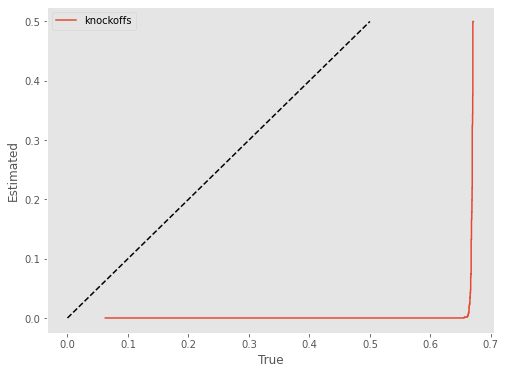

In [102]:
# plot estimated and true q-values
def combine_true_est(q_val_true,q_val_est):
    res = []
    q_idx = 0
    for q_e, _, score in q_val_est:
        while q_idx < len(q_val_true)-1 and q_val_true[q_idx+1][2] >= score:
            q_idx += 1
        res.append((score, q_val_true[q_idx][0], q_e))
    return res
        
scores, trues, estimateds = zip(*combine_true_est(q_list_true, q_list_estimated))

import plot_q_vals
plot_q_vals.plot_q_vals( {'knockoffs':(trues,estimateds)})

In [103]:
len(hits)


1313

In [104]:
documents_query_s2v = documents_query

In [105]:


test_matches_s2v = []

cosine_thresholds = np.arange(0,1,0.05)

# for every query
# find its 'hit'
# if True match, 1
# if False match, 0
# otherwise, -1

hit_dict = { hit.query:hit for hit in hits }

for threshold in cosine_thresholds:
    print(f"Checking matches for spec2vec score > {threshold:.2f}")
    test_matches = []
    for doc in documents_query:
        if doc in hit_dict and hit_dict[doc].score > threshold:
            hit = hit_dict[doc]
            test_matches.append(1 * hit.hit)                
        else:
            test_matches.append(-1)

    # Make arrays from lists:
    test_arr = np.array(test_matches)
    test_matches_s2v.append([np.sum(test_arr == 1), np.sum(test_arr == 0), np.sum(test_arr == -1)])
    
print(test_matches_s2v)

Checking matches for spec2vec score > 0.00
Checking matches for spec2vec score > 0.05
Checking matches for spec2vec score > 0.10
Checking matches for spec2vec score > 0.15
Checking matches for spec2vec score > 0.20
Checking matches for spec2vec score > 0.25
Checking matches for spec2vec score > 0.30
Checking matches for spec2vec score > 0.35
Checking matches for spec2vec score > 0.40
Checking matches for spec2vec score > 0.45
Checking matches for spec2vec score > 0.50
Checking matches for spec2vec score > 0.55
Checking matches for spec2vec score > 0.60
Checking matches for spec2vec score > 0.65
Checking matches for spec2vec score > 0.70
Checking matches for spec2vec score > 0.75
Checking matches for spec2vec score > 0.80
Checking matches for spec2vec score > 0.85
Checking matches for spec2vec score > 0.90
Checking matches for spec2vec score > 0.95
[[432, 878, 190], [432, 878, 190], [432, 876, 192], [432, 874, 194], [432, 869, 199], [432, 867, 201], [432, 864, 204], [432, 859, 209], [43

Text(0, 0.5, 'true positive rate')

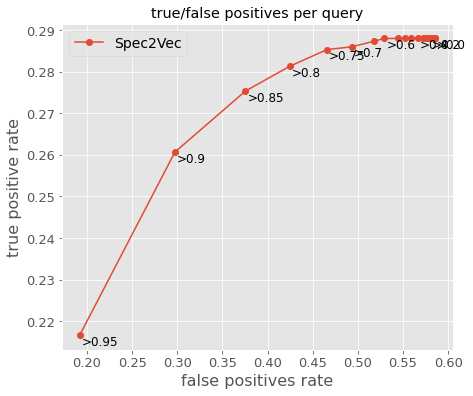

In [106]:
min_match = 6
test_matches_s2v_arr = np.array(test_matches_s2v)

thresholds = np.arange(0, 1, 0.05)
label_picks = [0,4,8,12,14,15,16,17,18,19]

plt.figure(figsize=(7,6))
plt.style.use('ggplot')
num_max = np.sum(test_matches_s2v_arr[0,:])

plt.plot(test_matches_s2v_arr[:,1]/num_max, test_matches_s2v_arr[:,0]/num_max, 
         'o-', label='Spec2Vec')
for i, threshold in enumerate(thresholds):
    if i in label_picks:
        plt.annotate(">{:.2}".format(threshold),
                    (test_matches_s2v_arr[i,1]/num_max, test_matches_s2v_arr[i,0]/num_max),
                    textcoords="offset points", xytext=(2,-10), fontsize=12)

#plt.plot(test_matches_ROC_min2_arr[:,1]/num_max, test_matches_ROC_min2_arr[:,0]/num_max, 
#         '.--', color='black', alpha=0.5, label='cosine (min match = 2)')

plt.title('true/false positives per query')
plt.legend(fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('false positives rate', fontsize=16)
plt.ylabel('true positive rate', fontsize=16)